Importing the Dependencies

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm

Data Collection and Analysis

PIMA Diabetes Dataset

In [289]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('winequality-red.csv')

In [290]:
# printing the first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [291]:
# number of rows and Columns in this dataset
df.shape

(1599, 12)

In [292]:
# getting the statistical measures of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [293]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [294]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# number of values for each quality
Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


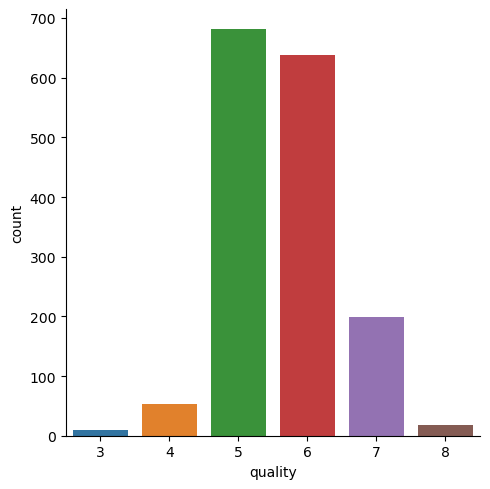

In [295]:
sns.catplot(x='quality',data=df,kind='count')

In [296]:
import matplotlib.pyplot as plt

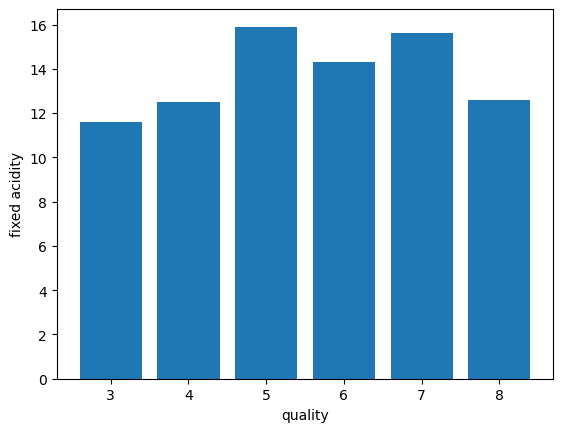

In [297]:
plt.bar(df['quality'],df['fixed acidity'])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

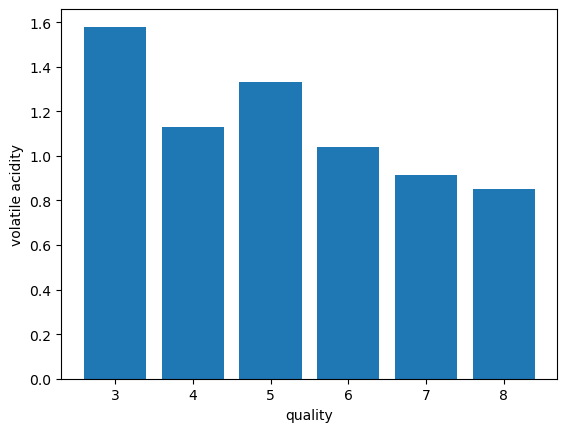

In [298]:
plt.bar(df['quality'],df['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

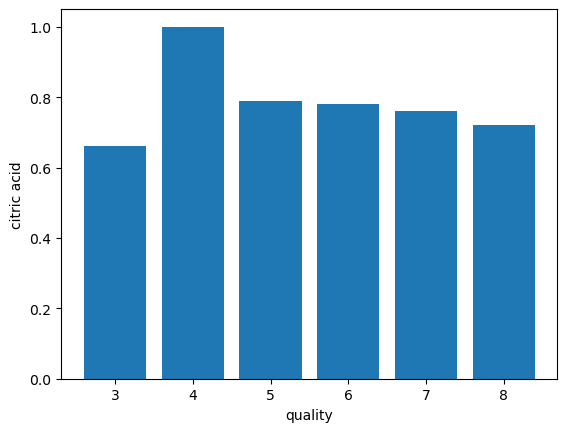

In [299]:
plt.bar(df['quality'],df['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

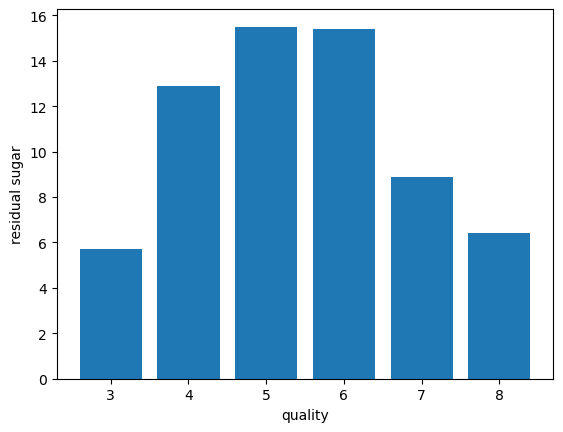

In [300]:
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

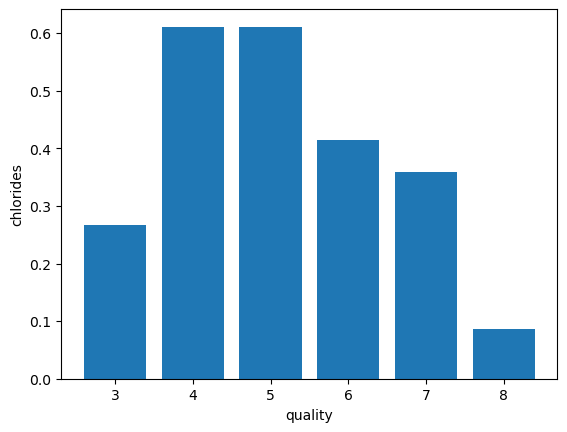

In [301]:
plt.bar(df['quality'],df['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

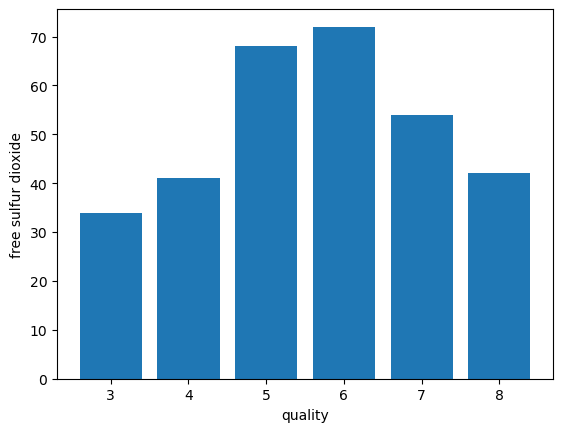

In [302]:
plt.bar(df['quality'],df['free sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

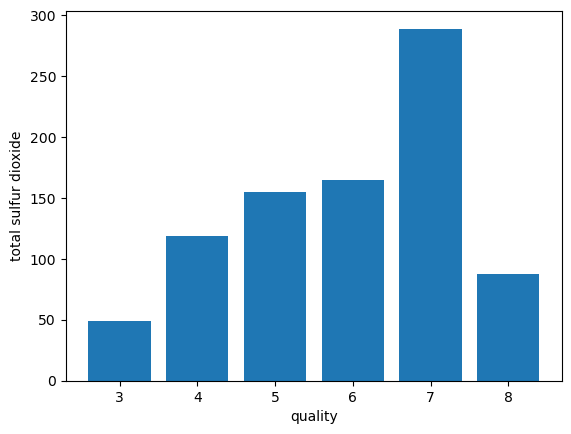

In [303]:
plt.bar(df['quality'],df['total sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

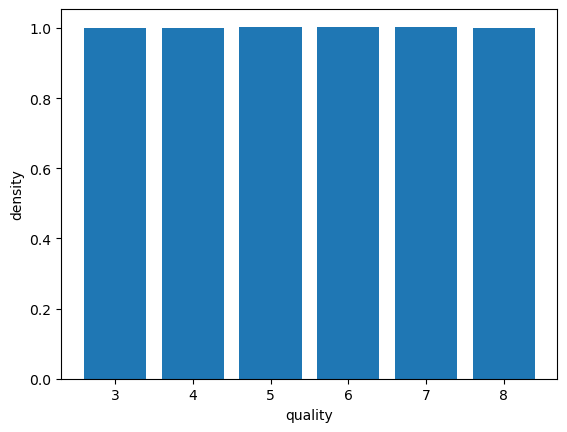

In [304]:
plt.bar(df['quality'],df['density'])
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

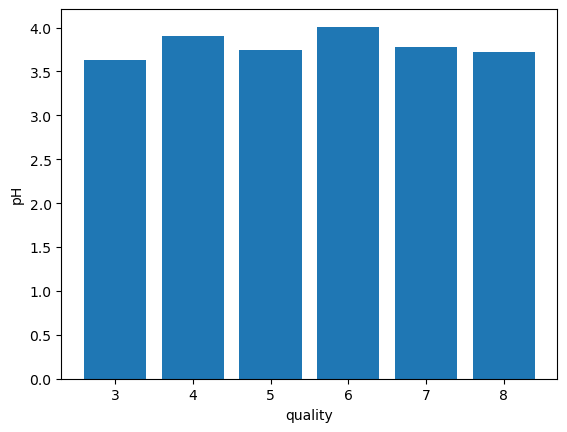

In [305]:
plt.bar(df['quality'],df['pH'])
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

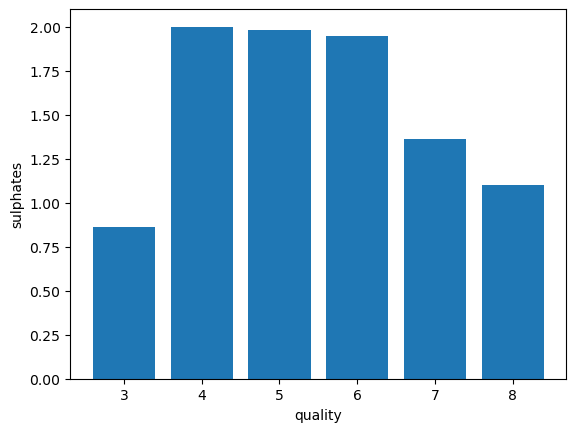

In [306]:
plt.bar(df['quality'],df['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

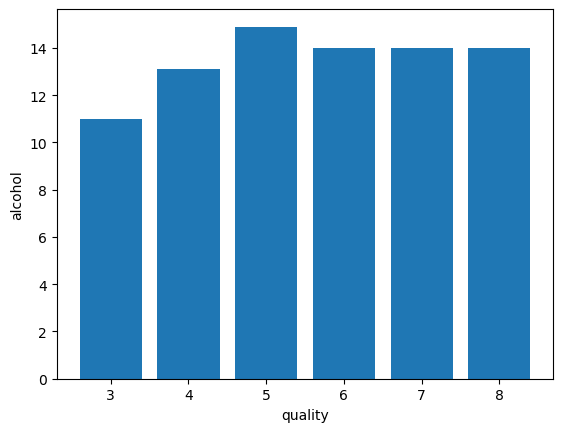

In [307]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [308]:
# separating the data and labels
X = df.drop('quality',axis=1)
y = df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [309]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [310]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [311]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [312]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the Model

In [314]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [315]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.93125


In [316]:
print(classification_report(Y_test,X_test_prediction))
rfc_classification_report = classification_report(Y_test,X_test_prediction, zero_division=0, output_dict=True)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.80      0.54      0.65        37

    accuracy                           0.93       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.93      0.93      0.93       320



Making a Predictive System

In [317]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality  Red Wine')
else:
  print('Bad Quality Red Wine')

[0]
Bad Quality Red Wine


Saving the trained model

In [318]:
import pickle

In [319]:
model_filename = 'trained_model.sav'
pickle.dump(model, open(model_filename, 'wb'))

In [320]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [321]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality  Red Wine')
else:
  print('Bad Quality Red Wine')

[0]
Bad Quality Red Wine
